# Uma introdução a Metaprogramação (com Python)

## Sumário

- [De onde surgiu a ideia?](#De-onde-surgiu-a-ideia?)
- [Considerações iniciais](#Considerações-iniciais)
- [O que é?](#O-que-é?)
    - [O que não é](#O-que-não-é)
    - [Definições](#Definições)
    - [Casos](#Casos)
    - [Vantagens e desvantagens](#Vantagens-e-desvantagens)
- [Onde vivem?](#Onde-vivem?)
    - [#define (C)](##define-(C))
    - [eval (Python)](#eval-(Python))
    - [decorators (Python)](#decorators-(Python))
    - [metaclasses (Python)](#metaclasses-(Python))
    - [macros (Elixir)](#macros-(Elixir))
- [Do que se alimentam?](#Do-que-se-alimentam?)
- [Como se reproduzem?](#Como-se-reproduzem?)
- [Python e metaprogramação](#Python-e-metaprogramação)
    - [eval](#eval)
    - [exec](#exec)
    - [decorators](#decorators)
    - [interceptação](#interceptação)
    - [descritores](#descritores)
    - [metaclasses](#metaclasses)
- [Material extra](#Material-extra)
- [Referencias](#Referencias)

## De onde surgiu a ideia?

Me descobri um curioso sobre o mundo das linguagens de programação. Suas finalidades, estruturas, particularidades, etc.

Gosto bastante de entender como as coisas funcionam, e assim acabo dando inicio a vários projetinhos, mas nem sempre finalizo/lanço todos.

- Criando meu proprio framework web, o [Frasko](https://github.com/exageraldo/talks/tree/main/2022-08-27-python-floripa).
- Criando meus proprio interpretador (ainda incompleto, sem nome e não lançado).
- Criando meus proprio ORM para interagir com o Google Datastore, o [NoSeiQueLa ORM](https://github.com/exageraldo/noseiquela-orm).

A ideia me surgiu depois que finalizei a apresentação sobre o Frasko e comecei a enfrentar vários percalços no desenvolvimento do NoSeiQueLa. E um tópico que estava sendo bem novo pra mim era a tal da "metaclasse", e pra entender melhor acabei caindo nos tópicos de metaprogramação.

Gosto bastante de conversar e gosto de estudar coisas diferentes, então pensei "por que não estudar pra apresentar?!"

## Considerações iniciais

A apresentaçao desse conteudo tem uma duração média de 50 a 60 minutos.

Esse material não tem a intenção de ser algo aprofundado no estudo de metaclasse, metaprogramação, nem nada do tipo. **Está mais para um roteiro para seguirmos uma boa conversa!**

Gosto bastante de conversar e muito provavelmente vou devagar/brisar entre alguns assuntos.

Para melhor compreender esse conteudo, é esperado/desejado:
- Conhecimento/experiencia na linguagem de programação Python
- Alguns conceitos de computação (POO/funcional, macros, compilar/interpretar, ...)

## O que é?

### O que não é
<img src="https://static.vecteezy.com/system/resources/previews/004/263/114/original/meta-logo-meta-by-facebook-icon-editorial-logo-for-social-media-free-vector.jpg" alt="" width="200"/> <img src="https://media-exp1.licdn.com/dms/image/C4D0BAQHPtEW9BXnEVQ/company-logo_200_200/0/1647279792930?e=1677110400&v=beta&t=fNW_hs7VpAoG_Ydjf8yaXVvr1xefdz1DiN2ok9wNnJo" alt="" width="200"/>

### Definições

`Meta`: Prefixo usado para significar sobre (sua própria categoria)
- metadados -> dados sobre dados
- metadiscussão -> discussão sobre discussão
- metapiada -> piada sobre piadas
- **metaprogramação -> escrever programas que escrevem programas**


Algumas definições interessantes sobre metaprogramação:

- Metaprogramação é a programação de programas que escrevem ou manipulam outros programas (ou a si próprios) assim como seus dados, ou que fazem parte do trabalho em tempo de compilação.
- De um modo geral, metaprogramação é toda programação que atua sobre outro programa, seja em formato fonte, binário, ou numa representação abstrata em memória.
- Técnica de especificar modelos genéricos de código fonte a partir dos quais classes de componentes, ou partes deles, podem ser instanciadas automaticamente para produzir novos componentes de software.
- Metaprogramação é escrever programas onde eles mesmos escrevem código.

### Casos

A metaprogramação tem muitas aplicações, algumas delas são:

- geração de compiladores
- geração de aplicações
- análise de código
- criação de componentes genéricos
- transformações/modificações de programas
- manutenção/evolução/configuração de software
- otimização preventiva
- padrões de projeto
- avaliação parcial

### Vantagens e desvantagens

#### Vantagens

- **Extensível**: Como o código é tratado como dados, é fácil estender os programas. O código pode ser adicionado simplesmente adicionando metadados.
- **Fundamentação**: Metaprogramas tais como analisadores de fluxo e verificadores de tipo nos ajudam a descobrir propriedades sobre programas, validar comportamentos ou melhorar o desempenho.
- **Precisão**: Compilar código a partir de uma linguagem de alto nível para código de máquina ou bytecode não é algo que desejamos fazer manualmente. Se feito manualmente, é fácil introduzir erros. Os metaprogramas ajudam em tarefas tão tediosas, mas necessárias. 
- **Menos código**: A longo prazo, a metaprogramação automatiza a escrita de códigos e reduz o esforço manual. O uso de macros (como em Elixir, C ou C++) economiza tempo de desenvolvimento e promove o código reutilizável. Os padrões de códigos recorrentes podem ser abstraídos e reutilizados mesmo quando funções, genéricos ou classes são incapazes de fazê-lo. 
- **Performance**: Ao invés de ter variáveis na memória e passá-las, tudo é embalado em uma string concatenada e executada. A metaprogramação permite abstrações sem penalidade de tempo de execução. Ela pode ser útil para empurrar computações do tempo de execução (runtime) para o tempo de compilação (compile time). Os metaprogramas podem ajudar a adaptar/ajustar os programas a arquiteturas específicas.

#### Desvantagens

- **Dificuldade**: As técnicas utilizadas na metaprogramação são muitas vezes obscuras para muitas pessoas, exceto especialistas em linguagem. Os códigos que utilizam modelos de maneira complicada são muitas vezes ilegíveis e difíceis de debugar ou manter.
- **Segurança**: Sempre que você estiver executando uma string como código, ela pode ser bastante insegura, e como programador usando metaprogramação, você certamente deve pelo menos estar ciente disto. Felizmente, muitas línguas utilizam diferentes estados para a metaexecução, o que torna isto irrelevante.
- **Exceções**: Provavelmente, uma das coisas mais dolorosas da meta-programação é encontrar erros de analisé/parse. Sempre que uma string não pode ser analisado, é muito comum obter algum resultado muito inesperado.
- **Erros invisíveis**: A falta de coerência nas exceções é uma chance de encontrar bugs invisíveis. Estes são pequenos problemas que podem se desenvolver sempre que muitas instruções são empilhadas umas em cima das outras. É desnecessário dizer que sempre que se trabalha com muitas instruções diferentes ao mesmo tempo e se encontra algo esquisito, é incrivelmente difícil diagnosticar o que exatamente está causando seu problema.
- **Strings**: Se alguém alguma vez disse que colocar código em strings significaria adicionar muitas expressões regulares, então provavelmente estavam corretas! O Regex pode ser uma fera muito complicada de lidar, e às vezes certamente não funcionará exatamente como você esperava que funcionasse. Lembre-se; todo o seu código está em strings, então qualquer problema sintático é imediatamente agravado e tornado mais complicado.

## Onde vivem?

Compiladores, transpiladores e interpretatores são bons exemplos de metaprogramas. Eles tomam programas em uma forma e os transformam em código de máquina, bytecode ou mesmo código fonte em outra língua.

As linguagens dinâmicas ou interpretadas geralmente têm uma função "`eval`" que permite a execução do código fornecido como strings. Isto também é metaprogramação.

### `#define` (C)

Na Linguagem de Programação C, a diretiva `#define` permite a definição de macros dentro de seu código. Estas definições de macros permitem que valores constantes sejam declarados para uso em todo o seu código.

As definições de macros permitem substituir uma expressão complexa por outra mais simples, sendo que a substituição é feita pelo próprio compilador e não podem ser alteradas pelo código de seu programa como variáveis.
```C
#include <stdio.h>
#define ADD(a, b) ((a) + (b))

int main() {
    int value = ADD(10, 20);
    printf("A soma deu %i", value);
    return 0;
}

// SAÍDA
// A soma deu 30
```

### `eval` (Python)

Outro exemplo é o `eval`, suportado por diversas linguagens. Ele permite que um trecho de código/expressão seja formado usando-se não somente um texto estático mas também componentes dinâmicos.
```Python
from itertools import cycle

def operacoes_em_lista(ops: list, nums: list) -> int:
    ops = cycle(ops)
    result = ""
    for (num, op) in zip(nums, ops):
        result += f"{num}{op}"

    print(result[:-1])
    return(int(eval(result[:-1])))

operacoes_em_lista(["+", "*"], [1, 2, 3, 4, 5])

## SAÍDA
# 1+2*3+4*5
# 27
```

No Python existe tambem o `exec` que, diferente do `eval`, pode executar várias linhas de código ao mesmo tempo e não traz retorno nenhum.

O uso tanto do `eval` como do `exec` devem ser feitos com muito cuidado!

### `decorators` (Python)

Toda linguagem que possui funções de primeira classe abre espaço para que as mesmas sejam modificadas programaticamente. A forma mais simples é através de decoradores.
```Python
def decorator(function):
    def wrapper(arg1, arg2):
        print(f"Function name: {function.__name__}")
        print(f"My arguments are: {arg1}, {arg2}")
        function(arg1, arg2)
    return wrapper


@decorator
def cities(city_one, city_two):
    print(f"Cities I love are {city_one} and {city_two}")

cities("Nairobi", "Accra")

## SAÍDA
# Function name: cities
# My arguments are: Nairobi, Accra
# Cities I love are Nairobi and Accra
```

Tambem é possivel utilizar decorators em classes, caso a linguagem possua classes como "cidadãs de primeira classe"/"classes de primeira classe".

```Python
def class_decorator(klass):
    def _display(self):
        print(f"Name: {self.name}")
        print("I Love Metaprogramming")
    
    klass.display = _display
    return klass


class ClasseSemDecorator:
    def __init__(self, name):
        self.name = name
        
    def display(self):
        print(f"Name: {self.name}")


@class_decorator
class ClasseComDecorator:
    def __init__(self, name):
        self.name = name
        
    def display(self):
        print(f"Name: {self.name}")
        
print("classe sem decorator")
obj = ClasseSemDecorator("Geraldo")
obj.display()

print("classe com decorator")
obj = ClasseComDecorator("Xicó")
obj.display()

# SAÍDA
# classe sem decorator
# Name: Geraldo
# classe com decorator
# Name: Xicó
# I Love Metaprogramming
```

### `metaclasses` (Python)

Em orientação a objetos, uma metaclasse é uma classe cujas instâncias também são classes e não objetos no sentido tradicional. Assim como classes definem o comportamento de certos objetos, metaclasses definem o comportamento de certas classes e suas instâncias.

Um exemplo é a implementação do padrão "Singleton":
```Python
class SingletonMeta(type):
    _instances = {}
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            cls._instances[cls] = super(
                SingletonMeta,
                cls
            ).__call__(*args, **kwargs)
        return cls._instances[cls]

class SingletonClass(metaclass=SingletonMeta):
    pass
```

### `macros` (Elixir)
As macros são construções em tempo de compilação que são invocadas/chamadas com o AST do Elixir como entrada e um superconjunto do AST do Elixir como saída. Com macros temos tudo que é necessário para estender Elixir e dinamicamente adicionar código para nossas aplicações.

```Elixir
defmodule Foo do
  defmacro macro_inspect(value) do
    IO.inspect(value)
    value
  end
 
  def func_inspect(value) do
    IO.inspect(value)
    value
  end
end
```

Executando a macro no IEX:
```
iex(1)> import Foo
iex(2)> macro_inspect(1 + 2)
{:+, [context: Elixir, import: Kernel], [1, 2]}
3
iex(3)> func_inspect(1 + 2)
3
3
```

Um dos casos mais conhecidos do uso de macros na linguagem é o [ORM Ecto](https://github.com/elixir-ecto/ecto).

## Do que se alimentam?

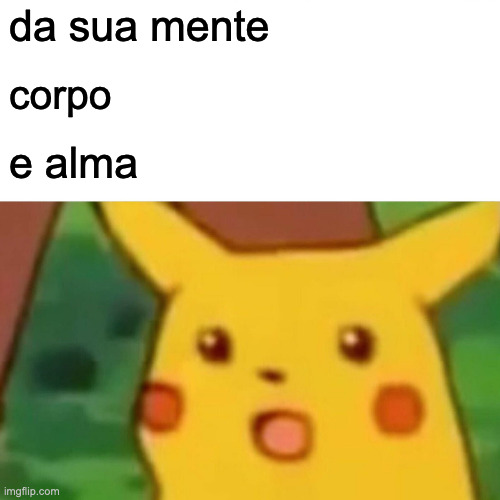

## Como se reproduzem?

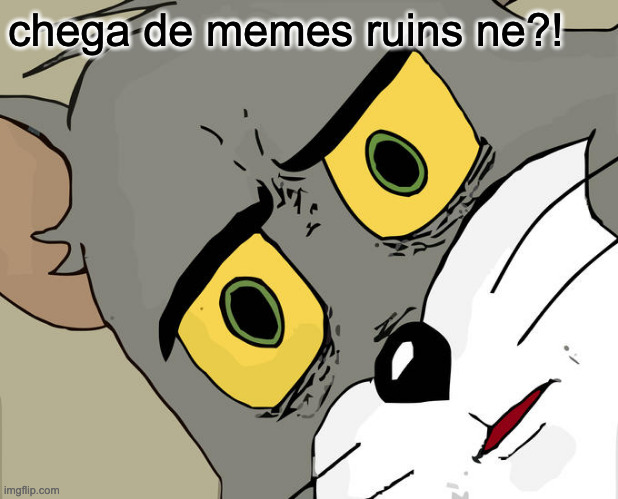

## Python e metaprogramação

![](https://c.tenor.com/wHf6EVXXI7YAAAAC/coloque-a-mao-na-massa-joao-pimenta.gif)

### eval

Usado para avaliar dinamicamente expressões a partir de uma entrada baseada em strings ou em código compilado.

Ao passar apenas uma string, a função irá analisa-la, a compila para bytecode e a avalia (**eval**uate) como uma expressão Python. Mas se passarmos com um objeto de código compilado, então a função executa apenas a etapa de avaliação.

Sua estrutura é:
```python
eval(expression[, globals[, locals]])
```

In [1]:
val1 = 1
val2 = eval('val1 + 1')
print(val2)

2


Para avaliar uma expressão baseada em strings, a função executa os seguintes passos:
- Analisa a expressão
- Compila para bytecode
- Avalia como uma expressão Python
- Retorna o resultado da avaliação


Se tentarmos avaliar uma declaração composta, uma exceção do tipo `SyntaxError` será levantada. Isso porque a função `eval` só aceita expressões. Qualquer outra declaração, como se, por exemplo, `if`, `for`, `while`, `import`, `def` ou `class`, irá levantar um erro.

In [2]:
x = 100
eval("if x: print(x)")

SyntaxError: invalid syntax (<string>, line 1)

Operações de atribuição também não são permitidas.

In [3]:
eval("pi = 3.1416")

SyntaxError: invalid syntax (<string>, line 1)

Porem o operador Walrus (`:=`) é conhecido como o "operador de expressão de atribuição" ("`assignment expression operator`"). Dessa forma é permitido fazermos expressões como essa:

In [4]:
eval("(pi := 3.1416)")
print(pi)

3.1416


Um exemplo com um pouco mais de código, porem ainda bem "aleatorio".

In [5]:
from itertools import cycle

def operacoes_em_lista(ops: list, nums: list) -> int:
    ops = cycle(ops)
    result = ""
    for (num, op) in zip(nums, ops):
        result += f"{num}{op}"

    print(result[:-1])
    return(int(eval(result[:-1])))

In [6]:
operacoes_em_lista(["+"], [1, 2, 3, 4, 5])

1+2+3+4+5


15

In [7]:
operacoes_em_lista(["+", "*"], [1, 2, 3, 4, 5])

1+2*3+4*5


27

In [8]:
operacoes_em_lista(["+", "-"], [1, 2, 3, 4, 5])

1+2-3+4-5


-1

### exec

Bem semelhante ao `eval`, a função `exec` permite executar código Python arbitrário a partir de uma string ou de uma entrada de código compilada.

Porem, diferente do `eval`, função pode pegar um bloco de código que tem declarações Python como laços, try/except:, definição de classes e funções/metodos e assim por diante. E tambem não traz retorno algum.

In [9]:
exec("import this")

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [10]:
programa = '''
def legal_demais(num):
    for i in range(num):
        print("Python é muito legal")
'''
exec(programa)
legal_demais(3)

Python é muito legal
Python é muito legal
Python é muito legal


A própria biblioteca padrão tem alguns módulos que utilizam `exec` para executar trechos de código fornecido pelo usuário como uma string.

Um bom exemplo é o módulo timeit, que o próprio Guido van Rossum escreveu originalmente.

In [11]:
from timeit import timeit

timeit("'-'.join(str(n) for n in range(100))", number=10000)

0.145769027993083

O módulo doctest também usa o `exec` para executar qualquer código interativo embutido na docstring.

### decorators

Por definição, um `decorator` é uma função que pega outra função e "extende" o comportamento desta última sem modificá-la explicitamente.

Em Python, as funções são objetos de primeira classe/cidadãos de primeira classe.

In [12]:
def meu_decorator(func):
    def envoltorio():
        print("Alguma coisa está acontecendo antes da função ser chamada")
        func()
        print("Alguma coisa está acontecendo depois da função ser chamada")
    return envoltorio

def diga_algo():
    print("Algo está sendo dito!")

diga_algo = meu_decorator(diga_algo)
diga_algo()

Alguma coisa está acontecendo antes da função ser chamada
Algo está sendo dito!
Alguma coisa está acontecendo depois da função ser chamada


Agora com um pouco de açúcar sintático (syntactic sugar), podemos usar o decorator de uma forma mais simples, apenas com o simbolo `@` (as vezes tambem chamado de sintaxe "torta"/"pie" syntax).

In [13]:
def meu_decorator(func):
    def envoltorio():
        print("Alguma coisa está acontecendo antes da função ser chamada")
        func()
        print("Alguma coisa está acontecendo depois da função ser chamada")
    return envoltorio

@meu_decorator
def diga_algo():
    print("Algo está sendo dito!")

diga_algo()

Alguma coisa está acontecendo antes da função ser chamada
Algo está sendo dito!
Alguma coisa está acontecendo depois da função ser chamada


In [14]:
def meu_decorator_com_args(func):
    def envoltorio(*args, **kwargs):
        print("Alguma coisa está acontecendo antes da função ser chamada")
        func_return = func(*args, **kwargs)
        print("Alguma coisa está acontecendo depois da função ser chamada")
        return func_return
    return envoltorio

@meu_decorator_com_args
def diga_algo(nome=None):
    if nome:
        print(f"Algo está sendo dito por {nome}!")
    else:
        print("Algo está sendo dito!")

In [15]:
diga_algo()

Alguma coisa está acontecendo antes da função ser chamada
Algo está sendo dito!
Alguma coisa está acontecendo depois da função ser chamada


In [16]:
diga_algo("Geraldo")

Alguma coisa está acontecendo antes da função ser chamada
Algo está sendo dito por Geraldo!
Alguma coisa está acontecendo depois da função ser chamada


É possivel tanto decorar funções como classes. Um ótimo exemplo que temos em uma biblioteca padrão é o `dataclass`.

In [17]:
from dataclasses import dataclass

@dataclass
class ClasseDecorada:
    nome: str
    numero: int

d_classe = ClasseDecorada("Algum nome", 42)
print(d_classe)

ClasseDecorada(nome='Algum nome', numero=42)


Podemos tambem:
- criar decorators com classes
- criar decorators que aceitam argumentos
- aninhar varios decoratos
- criar decorators com estados

In [18]:
def contar_chamadas(func):
    def envoltorio(*args, **kwargs):
        envoltorio.num_chamadas += 1
        print(f"Função {func.__name__!r} foi chamada {envoltorio.num_chamadas} vezes")
        return func(*args, **kwargs)
    envoltorio.num_chamadas = 0
    return envoltorio

@contar_chamadas
def diga_algo():
    print("Algo está sendo dito!")

In [19]:
diga_algo()
diga_algo()

Função 'diga_algo' foi chamada 1 vezes
Algo está sendo dito!
Função 'diga_algo' foi chamada 2 vezes
Algo está sendo dito!


### Interceptação

As coisas podem se tornar realmente dinâmicas em Python, como classes definidas em funções, objetos mudando de classe, interceptando métodos especiais, etc.

Primeiro vamos criar uma classe simples usando o `dataclass`, igual como fizemos anteriormente.

In [20]:
from dataclasses import dataclass

@dataclass
class ClasseExemplo:
    nome: str
    numero: int

obj_exemplo = ClasseExemplo("Algum nome", 42)
obj_exemplo

ClasseExemplo(nome='Algum nome', numero=42)

A instancia da classe `ClasseExemplo` possue dois atributos e seus valores são `nome='Algum nome'` e `numero=42`.

Podemos facilmente alterar o valor de qualquer um deles.

In [21]:
obj_exemplo.nome = "Outro nome"
obj_exemplo.nome

'Outro nome'

Uma coisa legal que podemos fazer é criar um "espião" para nos mostrar as mudanças de valores de cada atributo dessa classe.

In [22]:
def espiar_as_mudancas(obj):
    class Envoltorio(obj.__class__):
        def __setattr__(self, name, value):
            old = getattr(self, name, "<VAZIO>")
            print(f"Espião: {name}: {old!r} -> {value!r}")
            return super().__setattr__(name, value)
    obj.__class__ = Envoltorio

espiar_as_mudancas(obj_exemplo)

In [23]:
obj_exemplo.nome = "Um nome bem legal"
obj_exemplo.nome

Espião: nome: 'Outro nome' -> 'Um nome bem legal'


'Um nome bem legal'

In [24]:
obj_exemplo.numero = 13
obj_exemplo.numero

Espião: numero: 42 -> 13


13

### Descritores

- Um descritor é um atributo de objeto com comportamento de ligação cujo o acesso aos campos é sobrescrito por métodos do próprio descritor.
- O protocolo dos descritores é, basicamente, definir uma classe para controlar o acesso aos atributos de outra.
- Os descritores são uma forma de reutilizar a mesma lógica de acesso em vários atributos. Para exemplo, os tipos de campo em ORMs, como o Django ORM, SQLAlchemy e NoSeiQueLa, são descritores, gerenciando o fluxo de dados dos campos em um registro de banco de dados para Python atributos de objeto e vice versa.

O descritor é composto de três métodos, que possuem as seguintes estruturas:

- `descr.__get__(self, obj, type=None) -> value`
- `descr.__set__(self, obj, value) -> None`
- `descr.__delete__(self, obj) --> None`


Uma das formas de se implementar o descritor no Python é utilizando uma propriedade/`property`.

```python
property(fget=None, fset=None, fdel=None, doc=None) -> property attribute
```

In [25]:
class ClasseComDescritor:
    def getx(self): return self.__x
    def setx(self, value): self.__x = value
    def delx(self): del self.__x

    x = property(getx, setx, delx)

In [26]:
o_exemplo = ClasseComDescritor()
o_exemplo.x = 10
o_exemplo.x

10

Ou podemos usar como decorator.

In [27]:
class ClasseComDescritorDecorator:
    @property
    def x(self):
        return self.__x

    @x.setter
    def x(self, value):
        self.__x = value
    
    @x.deleter
    def x(self):
        del self.__x

In [28]:
o_exemplo = ClasseComDescritorDecorator()
o_exemplo.x = 10
o_exemplo.x

10

Com o protocolo de descritor, é possivel transferir a responsabilidade de regras de negócio sobre um campo para outra classe.

Desta forma mantemos a classe original focada na sua própria responsabilidade e deixa detalhes sobre os seus campos para uma classe específica.

In [29]:
class Descritor:
    def __init__(self, name):
        self.name = name

    def __get__(self, instance, owner):
        print(f"Pegando {self.name}")
        return instance.__dict__.get(self.name)

    def __set__(self, instance, value):
        print(f"Atualizando {self.name}")
        instance.__dict__[self.name] = value
    
    def __delete__(self, instance):
        print(f"Deletando {self.name}")
        if instance.__dict__.get(self.name) is not None:
            del instance.__dict__[self.name]

In [30]:
class ClasseExemplo:
    x = Descritor("x")
    y = 5
    
c_exemplo = ClasseExemplo()

In [31]:
c_exemplo.x = 20

Atualizando x


In [32]:
c_exemplo.x

Pegando x


20

In [33]:
c_exemplo.x

Pegando x


20

In [34]:
c_exemplo.y

5

In [35]:
del c_exemplo.x

Deletando x


In [36]:
c_exemplo.x

Pegando x


Agora vamos olhar dois pontos interessantes:
- `__set_name__`: É chamada automaticamente quando a classe está sendo criada, e recebe como parâmetros a classe e o nome do atributo como aparece definido na classe.
- `if instance is None: return self`: Se `__get__` não recebe `None` como argumento de instância/`instance`, o descritor está sendo chamado a partir de a própria classe, não uma instância. Assim, devemos retornar o proprio descritor (`self`).

In [37]:
class Descritor:
    def __init__(self, default_value=None):
        self.default_value = default_value

    def __get__(self, instance, owner):
        print(f"Pegando {self.name}")
        if instance is None:
            return self
        return instance.__dict__.get(self.name, self.default_value)

    def __set__(self, instance, value):
        print(f"Atualizando {self.name}")
        instance.__dict__[self.name] = value

    def __set_name__(self, owner, name):
        print(f"Definindo 'name' para {name}")
        self.name = name

In [38]:
class OutraClasseExemplo:
    x = Descritor(10)

Definindo 'name' para x


In [39]:
i_exemplo = OutraClasseExemplo()
i_exemplo.x

Pegando x


10

In [40]:
i_exemplo.x.default_value

Pegando x


AttributeError: 'int' object has no attribute 'default_value'

In [42]:
OutraClasseExemplo.x.default_value

Pegando x


10

Se o atributo for definido/atribuída depois que a classe for criada, `__set_name__` não será chamada automaticamente.

Se necessário, a função pode ser chamado diretamente.

In [43]:
class MaisOutraClasseExemplo:
    ...

x = Descritor(10)

In [44]:
MaisOutraClasseExemplo.x = x
x.__set_name__(MaisOutraClasseExemplo, 'x')

Definindo 'name' para x


Um bom exemplo é criar descritores responsaveis por validar tipos de informções especificas.

In [45]:
class CampoInteiro:
    def __init__(self, default_value=None):
        self.default_value = default_value

    def __get__(self, instance, owner):
        if instance is None:
            return self
        return instance.__dict__.get(
            self.name,
            self.default_value
        )

    def __set__(self, instance, value):
        if not isinstance(value, int):
            raise ValueError(f"O campo {self.name!r} deve ser um inteiro")
        instance.__dict__[self.name] = value

    def __set_name__(self, owner, name):
        self.name = name

In [46]:
class CampoBooleano:
    def __init__(self, default_value=None):
        self.default_value = default_value

    def __get__(self, instance, owner):
        if instance is None:
            return self
        return instance.__dict__.get(
            self.name,
            self.default_value
        )

    def __set__(self, instance, value):
        if not isinstance(value, bool):
            raise ValueError(f"O campo {self.name!r} deve ser um booleano")
        instance.__dict__[self.name] = value

    def __set_name__(self, owner, name):
        self.name = name

In [47]:
class IdeiaDeModelo:
    campo_inteiro = CampoInteiro(0)
    campo_booleano = CampoBooleano(False)
    
    def __repr__(self):
        return f"<IdeiaDeModelo campo_inteiro={self.campo_inteiro} campo_booleano={self.campo_booleano}>"

In [48]:
exemplo_modelo = IdeiaDeModelo()

exemplo_modelo.campo_inteiro = 10
exemplo_modelo.campo_booleano = True

exemplo_modelo

<IdeiaDeModelo campo_inteiro=10 campo_booleano=True>

In [49]:
exemplo_modelo.campo_inteiro = "a"

ValueError: O campo 'campo_inteiro' deve ser um inteiro

In [50]:
exemplo_modelo.campo_booleano = "a"

ValueError: O campo 'campo_booleano' deve ser um booleano

### Metaclasses

Na programação orientada a objetos, uma metaclasse é uma classe cujas instâncias são classes. Assim como uma classe comum define o comportamento de certos objetos, uma metaclasse define o comportamento de certas classes e suas instâncias.

Nem todas as linguagens de programação orientadas a objetos suportam metáclasses.

"Em Python, tudo é um objeto, inclusive as classes"

> “Metaclasses are deeper magic than 99% of users should ever worry about. If you wonder whether you need them, you don’t (the people who actually need them know with certainty that they need them, and don’t need an explanation about why).” - Tim Peters

In [51]:
class Foo:
    ...

type(Foo)

type

In [52]:
f = Foo()
type(f)

__main__.Foo

In [53]:
for t in int, float, dict, list, tuple:
    print(type(t))

<class 'type'>
<class 'type'>
<class 'type'>
<class 'type'>
<class 'type'>


In [54]:
type(type)

type

`type` é uma metaclasse, da qual as classes são instâncias.

![](https://files.realpython.com/media/class-chain.5cb031a299fe.png)


- `x` é uma instância de classe `Foo`.
- `Foo` é uma instância de `type`.
- `type` é também uma instância da metaclasse `type`, portanto, é uma instância de si mesma.


A função `type` pode ser usada de duas formas:
- passando apenas um argumento: ela tratá qual o tipo do objeto passado
- passando mais de um (dois ou tres) argumentos: define uma classe dinamicamente

In [55]:
XPTO = type('XPTO', (), {})

type(XPTO)

type

In [56]:
x = XPTO()
type(x)

__main__.XPTO

- name: especifica o nome da classe. Isto se torna o atributo `__name__` da classe.
- bases: especifica uma tupla das classes base das quais a classe herda. Isto se torna o atributo `__bases__` da classe.
- dict: especifica um namespace contendo definições para o corpo da classe. Isto se torna o atributo `__dict__` da classe.


In [57]:
XPTO = type(
    'XPTO',
    (),
    {
        'a': 100,
        'b': lambda self, num : self.a - num
    }
)

x = XPTO()

In [58]:
x.a

100

In [59]:
x.b(10)

90

In [60]:
class XPTOType(type):
    
    def __new__(cls, name, bases, dct):
        x = super().__new__(cls, name, bases, dct)
        x.a = 100
        x.b = lambda num: x.a - num
        x.__repr__ = lambda self: "Informações da instancia"
        return x
    
    def __repr__(self):
        return "Informações da classe"
    
XPTO = XPTOType("XPTO", (), {})

In [61]:
XPTO.a

100

In [62]:
XPTO.b(10)

90

In [63]:
class Bar(metaclass=XPTOType):
    ...

b = Bar()

In [64]:
Bar

Informações da classe

In [65]:
b

Informações da instancia

In [66]:
class SingletonMeta(type):
    _instances = {}
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            cls._instances[cls] = super(
                SingletonMeta,
                cls
            ).__call__(*args, **kwargs)
        return cls._instances[cls]

class SingletonClass(metaclass=SingletonMeta):
    pass

In [69]:
sc_one = SingletonClass()
sc_two = SingletonClass()

In [70]:
sc_one is sc_two

True

In [71]:
b_one = Bar()
b_two = Bar()

In [72]:
b_one is b_two

False

## Material extra

- [Fronteiras da Metaprogramação](https://www.youtube.com/watch?v=QnifmANG6VQ)
- [Metaclasses: Pra que servem? Onde vivem? Como se reproduzem? - Leonardo Almeida](https://www.youtube.com/watch?v=nQFwAJDiv5M)
- [Luciano Ramalho - Atributos, propriedades e descritores - encapsulamento e metaprogramação](https://www.youtube.com/watch?v=tF4Dlra3uNI)
- [Trilha Web | Metaprogramação em Python: metaclass e decorators - Felipe Volpone](https://www.youtube.com/watch?v=wdCNqoHz2uU)
- [Build Your Own **X**](https://github.com/codecrafters-io/build-your-own-x)
- [How to write a Python web framework](https://rahmonov.me/posts/write-python-framework-part-one)
- [Let’s Build A Simple Interpreter](https://ruslanspivak.com/lsbasi-part1/)

# Referencias

- https://pt.wikipedia.org/wiki/Metaprograma%C3%A7%C3%A3o
- https://pt.stackoverflow.com/questions/22398/o-que-%c3%a9-metaprograma%c3%a7%c3%a3o/22409#22409
- https://en.wikipedia.org/wiki/Metaprogramming
- https://pt.wikipedia.org/wiki/Metaclasse
- https://pt.stackoverflow.com/questions/22418/o-que-s%c3%a3o-metaclasses
- https://blog.appsignal.com/2021/09/07/an-introduction-to-metaprogramming-in-elixir.html
- https://en.wikipedia.org/wiki/First-class_citizen
- https://www.techonthenet.com/c_language/constants/create_define.php
- https://stackoverflow.com/questions/2220699/whats-the-difference-between-eval-exec-and-compile
- https://www.datacamp.com/tutorial/python-metaclasses
- https://www.datacamp.com/tutorial/decorators-python
- https://nedbatchelder.com/blog/202206/adding_a_dunder_to_an_object.html (https://twitter.com/nedbat/status/1533454622450503680)
- https://realpython.com/primer-on-python-decorators
- https://pencilprogrammer.com/decorate-python-class/
- https://thecodeboss.dev/2016/02/programming-concepts-type-introspection-and-reflection/
- https://devopedia.org/metaprogramming
- https://www.quora.com/Why-doesnt-Go-have-meta-programming
- https://livebook.manning.com/book/go-in-practice/chapter-11/
- https://towardsdatascience.com/the-pitfalls-of-meta-programming-944d3a36331c
- https://docs.python.org/3/library/functions.html#eval
- https://realpython.com/python-walrus-operator/
- https://realpython.com/python-eval-function/
- https://realpython.com/python-exec/
- https://docs.python.org/3/library/functions.html#exec
- https://docs.python.org/3/library/timeit.html
- https://docs.python.org/3/howto/descriptor.html
- https://pt.stackoverflow.com/questions/303982/qual-a-fun%C3%A7%C3%A3o-dos-descritores-em-python
- https://realpython.com/python-metaclasses/